**REGRESSION ANALYSIS WITH FISH MARKET DATA**

**Introduction**


<font size = "4"> **Tran Trung Hieu**
</font> <br>

<font size = "3"> *03 March 2023*
</font> 

I want to practice regression analysis by some fundamental models, such as Multiple Linear Regression, Lasso Regression, Ridge Regression, Elastic-Net Regression.

In this notebook, I chose the hyperparameters for regularized regression at random rather than taking tuning into consideration.

I divided my analysis into the following steps:


1. **[Conceptualizing the modeling task](#Conceptualize)**
2. **[Data Collection](#Collection)**
3. **[Data Exploration](#Exploration)**
4. **[Data Preparation](#Preparation)**
5. **[Model Training](#Modeltraining)**


## Conceptualizing the modeling task <a name="Conceptualize"></a>

The aim of the model is to establish the relationships between the target (weight of the fish) and the features.

## Data collection <a name="Collection"></a>

The dataset is published on Kaggle by AUNG PYAE. You can download this file [here](https://www.kaggle.com/datasets/aungpyaeap/fish-market).

## Data Exploration <a name="Exploration"></a>

In [1]:
# ========== Import important libraries ==========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
import os
import warnings
warnings.filterwarnings("ignore")

C:\Users\TrungHieu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\TrungHieu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
os.getcwd()

'C:\\Users\\TrungHieu\\Desktop\\AI Learning\\Project\\1.Regression Analysis on Fish Market Data'

In [3]:
# ========== Import dataset ==========
path = 'C:\\Users\\TrungHieu\\Desktop\\AI Learning\\Project\\1.Regression Analysis on Fish Market Data\Fish Dataset.csv'
df = pd.read_csv(path)

# Show the full data

df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


The dataset is structure data which contains 159 observations and 7 characteristics each observation. This dataset is a record of 7 common different fish species in fish market sales. Each record has 7 fields, which are:
* Species: species name of fish
* Weight: weight of fish in Gram
* Length1: vertical length in centimeter
* Length2: diagonal length in centimeter
* Length3: cross length in centimeter
* Height: height in centimeter
* Width: diagonal width in centimeter

In [4]:
# Check for data-type of each field

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


There is no null value in this dataset. 



In [5]:
# Other way to check missing value each columns
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
# Show 5 first observations and 5 last observations
head_and_tail = [df.head(), df.tail()]
pd.concat(head_and_tail)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [7]:
# ====== Data Summary =======
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


There is a fish with zero weight. It is maybe incorrect data and should be removed.


In [8]:
df[df.Weight == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [9]:
# ====== New dataframe without zero weight ====== 

df = df[df.Weight != 0]
df.shape
# So, there are 158 observations.

(158, 7)

In [10]:
# =====  How many species in the dataset ======

print('Numbers of species:', df.Species.nunique())

# ===== What are species name =======
print('Species name:', df.Species.unique())

# ===== Count each species =====

print('\n')
print( 'Count each species: \n',df['Species'].value_counts())

Numbers of species: 7
Species name: ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


Count each species: 
 Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


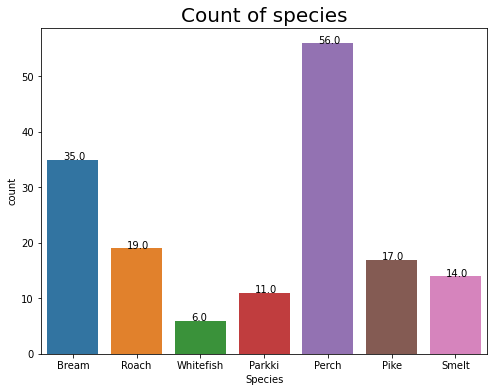

In [11]:
# ===== Visualize species count =====
plt.figure(figsize=(8, 6))
count_plot = sns.countplot(x = 'Species', data = df)
for p in count_plot.patches:
   count_plot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Count of species', size = 20)
plt.show()


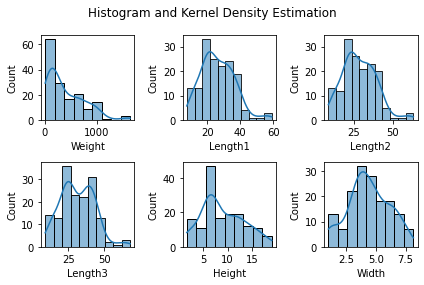

In [12]:
# =========== Histogram and Distribution of each characteristics ==========

nrows = 2
ncols = 3
names = df.columns[1:]

# Creating subplot axes

fig, axes = plt.subplots(nrows,ncols)

# Iterating through axes and names
for name, ax in zip(names, axes.flatten()):
    sns.histplot(data = df[name], ax = ax, kde = True)
fig.suptitle('Histogram and Kernel Density Estimation')
fig.tight_layout()
plt.show()

Visually, these characteristics are not normal distribution. Specially, 'length3' has 2 peaks, so it is bimodal distribution.
The 'Weight' is a right-skewed distribution.

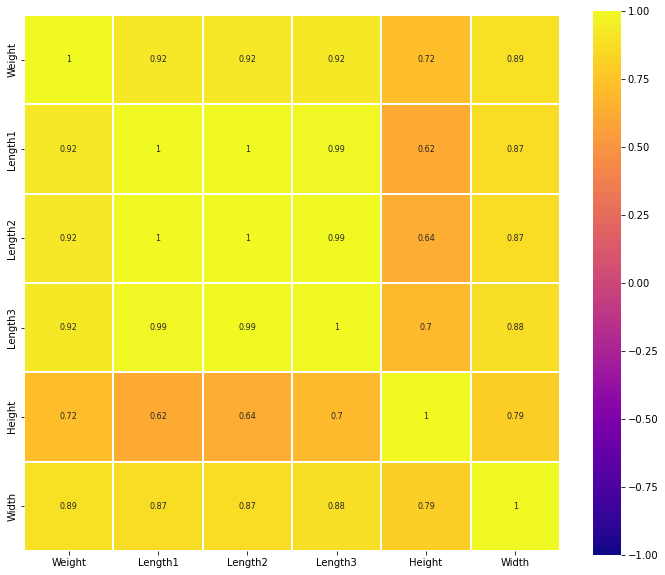

In [13]:
# =========== Covariance Matrix ===========
# numeric_only = True
corr = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='plasma', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

These characteristics are highly positively correlated with a minimum correlation coefficient of 0.62 which is between 'Height' and 'Width'.

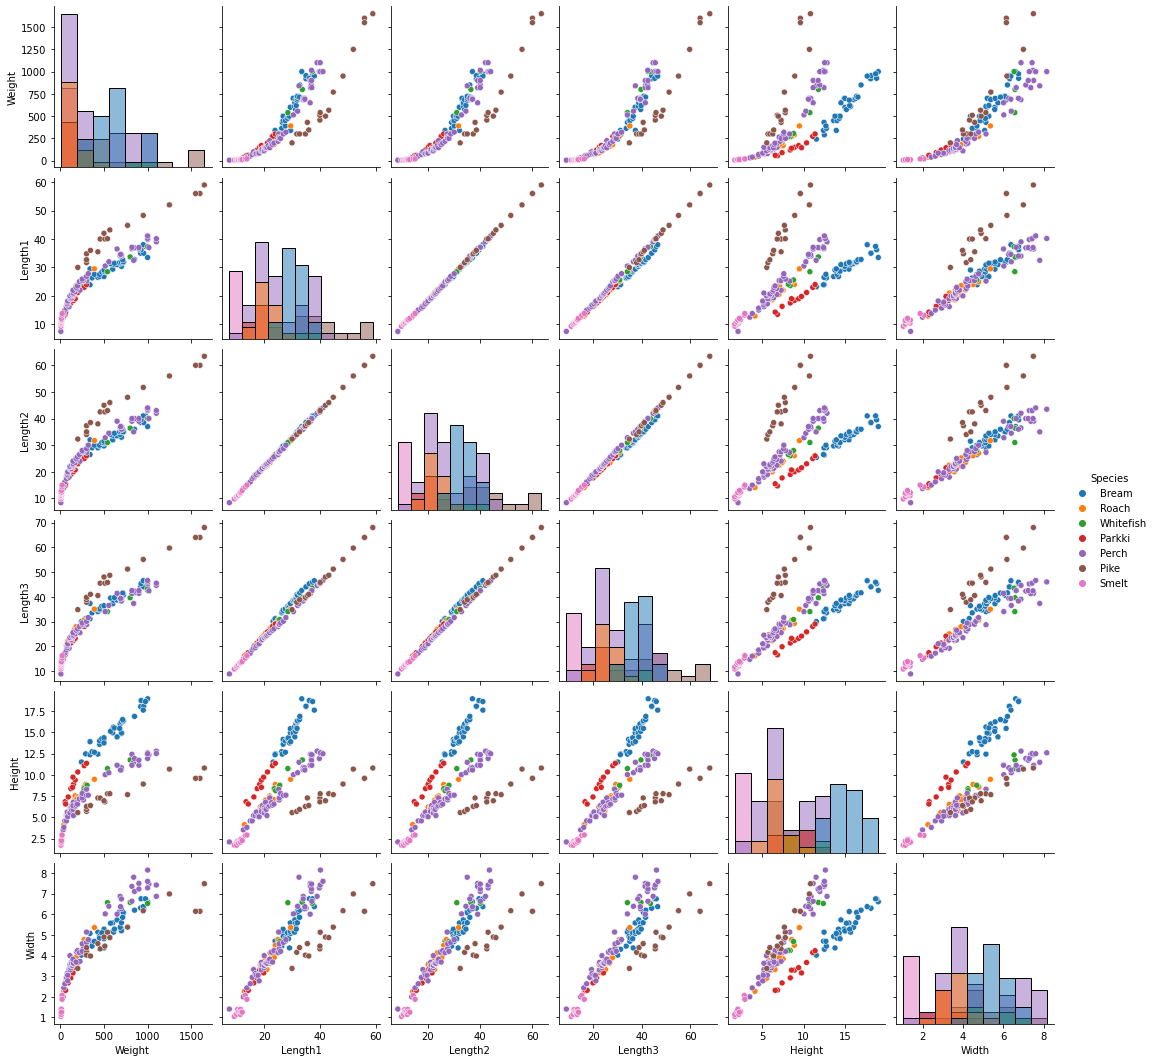

In [14]:
# =========== Pairplot ===========

sns.pairplot(data = df, hue = 'Species', diag_kind = 'hist')
plt.show()

In [15]:
# =========== Outlier Analysis ============

# Boxplot for each characteristic of each species:

b = []
for i in range(len(df.Species.unique())):
    b.append(df.loc[df['Species'] == df.Species.unique()[i]])   



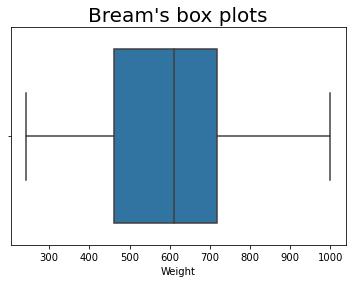

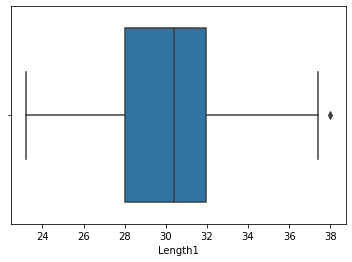

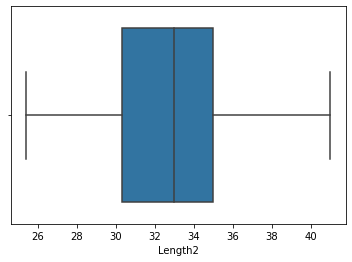

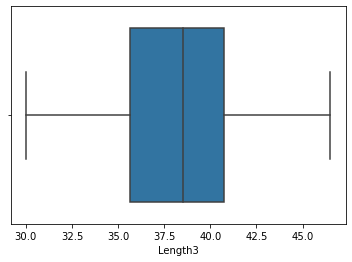

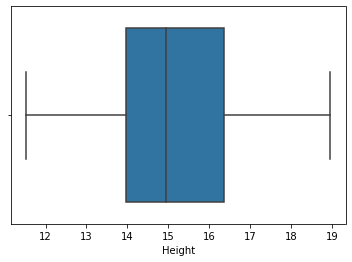

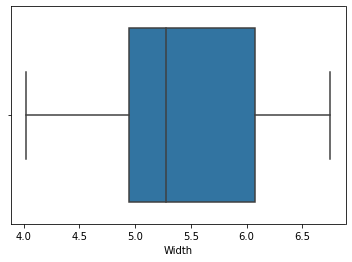

In [16]:
# ======== Bream ==============
plt.title('Bream\'s box plots', fontsize = 20)
sns.boxplot(x = b[0].Weight)
plt.show()
sns.boxplot(x = b[0].Length1)
plt.show()
sns.boxplot(x = b[0].Length2)
plt.show()
sns.boxplot(x = b[0].Length3)
plt.show()
sns.boxplot(x = b[0].Height)
plt.show()
sns.boxplot(x = b[0].Width)
plt.show()

Visually, Length1'Bream has outlier in length1

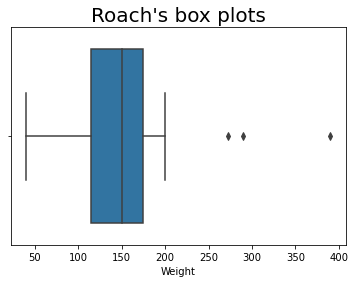

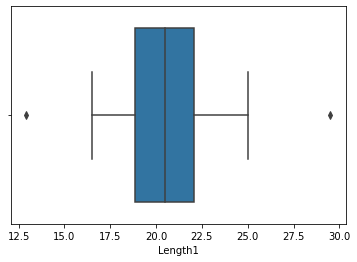

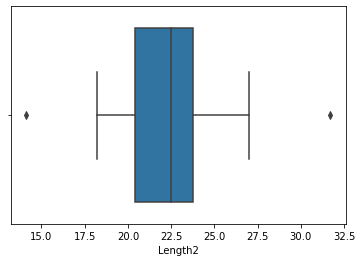

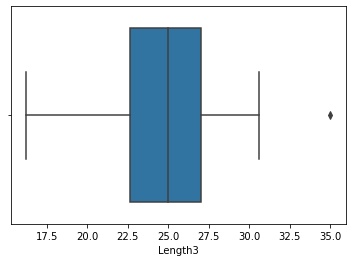

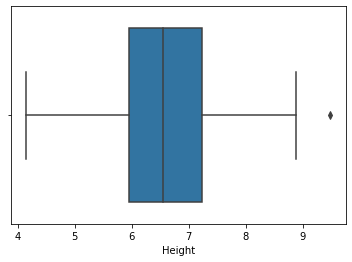

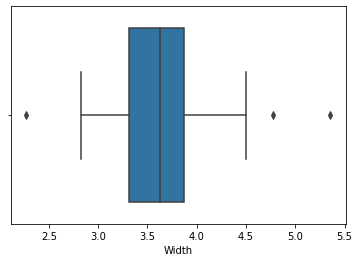

In [17]:
# ========== Roach =================
plt.title('Roach\'s box plots', fontsize = 20)
sns.boxplot(x = b[1].Weight)
plt.show()
sns.boxplot(x = b[1].Length1)
plt.show()
sns.boxplot(x = b[1].Length2)
plt.show()
sns.boxplot(x = b[1].Length3)
plt.show()
sns.boxplot(x = b[1].Height)
plt.show()
sns.boxplot(x = b[1].Width)
plt.show()

Visually, all characteristics of Roach have outliers

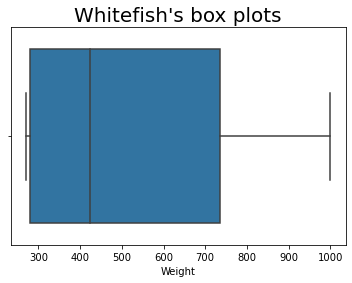

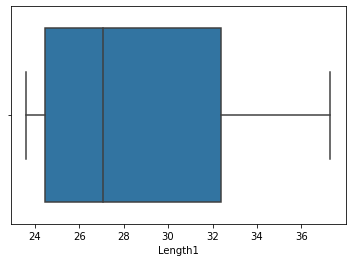

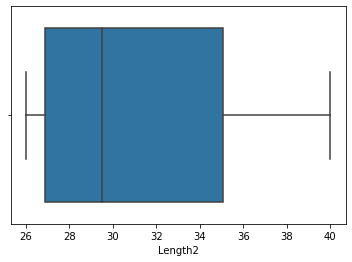

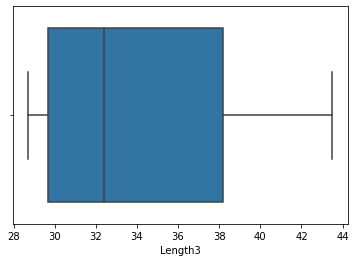

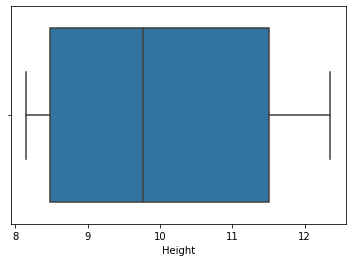

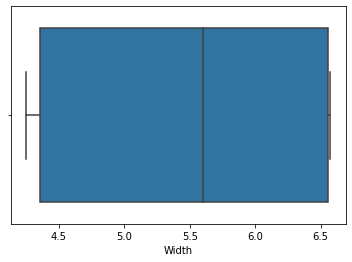

In [18]:
# ========= Whitefish =============
plt.title('Whitefish\'s box plots', fontsize = 20)
sns.boxplot(x = b[2].Weight)
plt.show()
sns.boxplot(x = b[2].Length1)
plt.show()
sns.boxplot(x = b[2].Length2)
plt.show()
sns.boxplot(x = b[2].Length3)
plt.show()
sns.boxplot(x = b[2].Height)
plt.show()
sns.boxplot(x = b[2].Width)
plt.show()

Visually, Whitefish has no outlier.

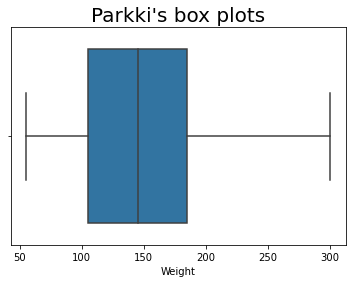

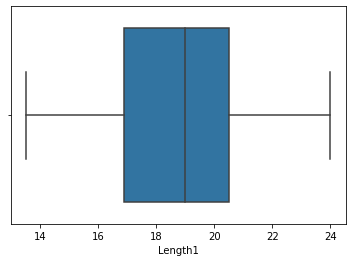

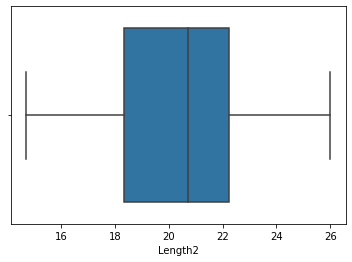

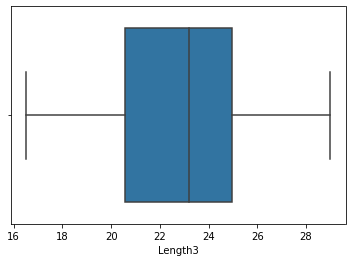

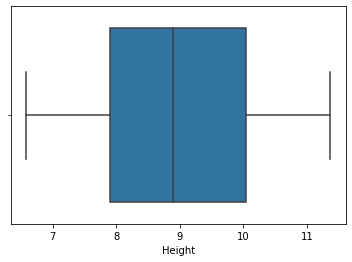

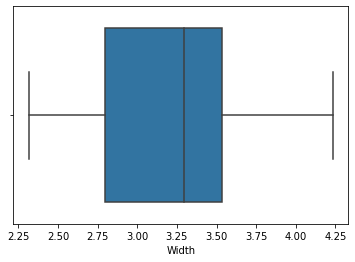

In [19]:
# ========= Parkki =============
plt.title('Parkki\'s box plots', fontsize = 20)
sns.boxplot(x = b[3].Weight)
plt.show()
sns.boxplot(x = b[3].Length1)
plt.show()
sns.boxplot(x = b[3].Length2)
plt.show()
sns.boxplot(x = b[3].Length3)
plt.show()
sns.boxplot(x = b[3].Height)
plt.show()
sns.boxplot(x = b[3].Width)
plt.show()

Visually, Parkki has no outlier

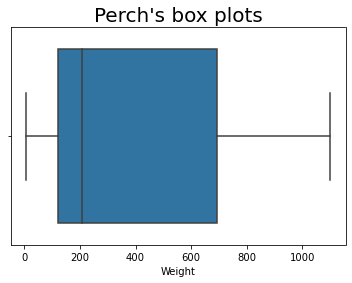

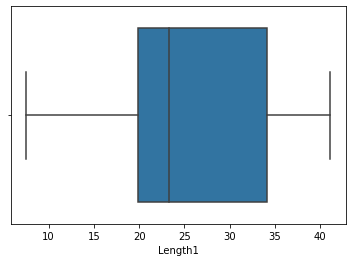

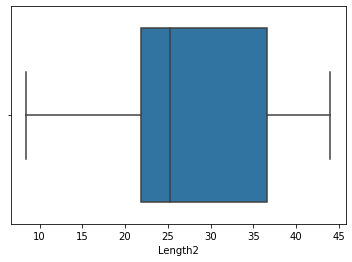

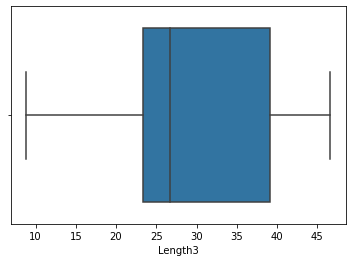

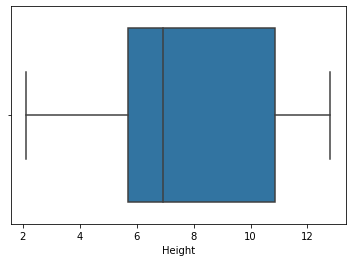

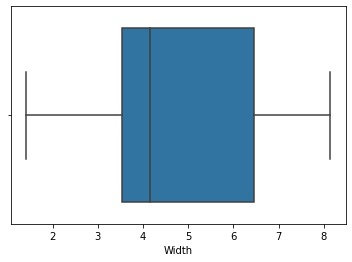

In [20]:
# ========== Perch ===========
plt.title('Perch\'s box plots', fontsize = 20)
sns.boxplot(x = b[4].Weight)
plt.show()
sns.boxplot(x = b[4].Length1)
plt.show()
sns.boxplot(x = b[4].Length2)
plt.show()
sns.boxplot(x = b[4].Length3)
plt.show()
sns.boxplot(x = b[4].Height)
plt.show()
sns.boxplot(x = b[4].Width)
plt.show()

Visually, Perch has no outlier

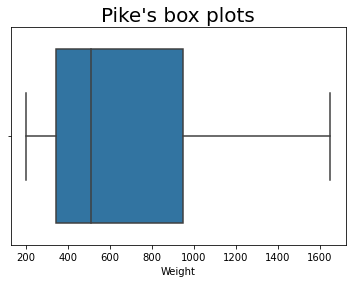

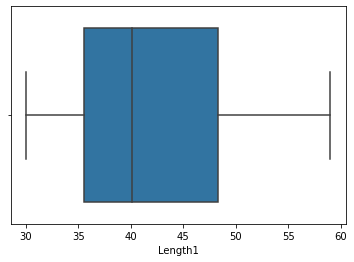

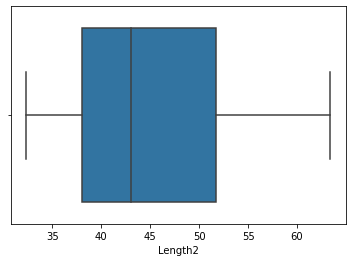

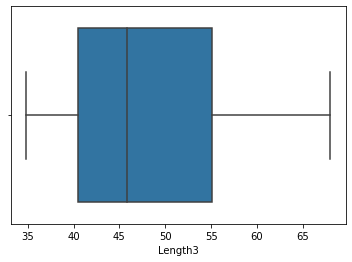

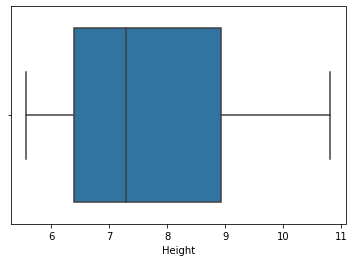

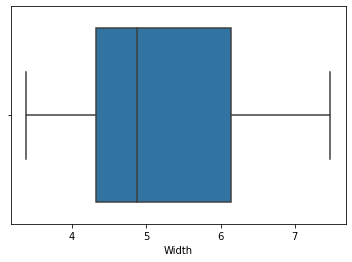

In [21]:
# ========== Pike ===========
plt.title('Pike\'s box plots', fontsize = 20)
sns.boxplot(x = b[5].Weight)
plt.show()
sns.boxplot(x = b[5].Length1)
plt.show()
sns.boxplot(x = b[5].Length2)
plt.show()
sns.boxplot(x = b[5].Length3)
plt.show()
sns.boxplot(x = b[5].Height)
plt.show()
sns.boxplot(x = b[5].Width)
plt.show()

Visually, Pike has no outlier

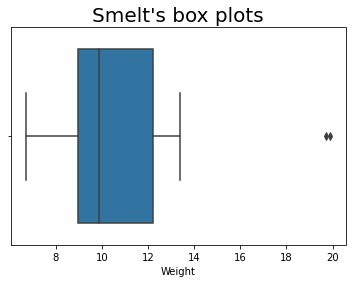

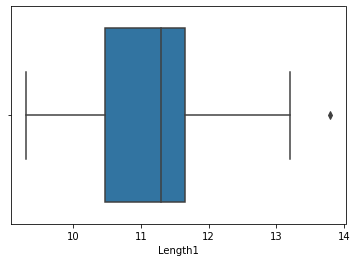

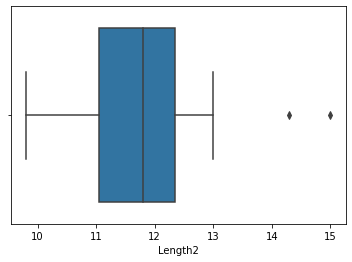

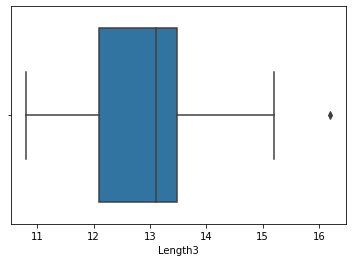

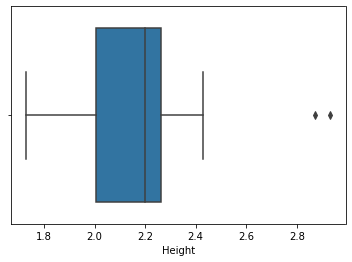

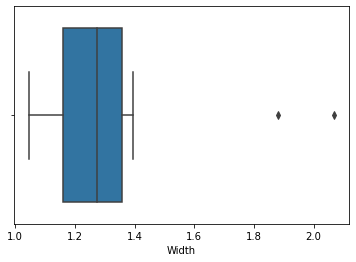

In [22]:
# ========== Smelt ===========
plt.title('Smelt\'s box plots', fontsize = 20)
sns.boxplot(x = b[6].Weight)
plt.show()
sns.boxplot(x = b[6].Length1)
plt.show()
sns.boxplot(x = b[6].Length2)
plt.show()
sns.boxplot(x = b[6].Length3)
plt.show()
sns.boxplot(x = b[6].Height)
plt.show()
sns.boxplot(x = b[6].Width)
plt.show()

Visually, Smelt has outliers in all characteristics.


In [23]:
# =========== Outlier Detection ===========
# There are several ways to identify outliers. 
# In this analysis, I went with visualizing boxplots for the initial look which are shown above  
# and the IQR approach which are widely accepted by many researchers.

def outlier_detection(data):
    outlier = []
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    for i in data:
        if i > upper_limit or i < lower_limit:
            outlier.append(i)
    if outlier == []: print('There is no outlier')
    else:
        print(f'There is/are {len(outlier)} outlier. They are {outlier}')
        return outlier




In [24]:
# =========== Bream ==========
df_Bream = df[df.Species == 'Bream']
# ===== Weight =====

outlier_detection(df_Bream.Weight)

### result: There is no outlier in Bream's weight

# ====== Length1 =====
outlier_detection(df_Bream.Length1)
### result: Bream has weight of 38 is outlier


# ====== Length2 =====
outlier_detection(df_Bream.Length2)
### result: There is no outlier in Bream's length2

# ====== Length3 =====
outlier_detection(df_Bream.Length3)
### result: There is no outlier in Bream's length3

# ====== Height ======
outlier_detection(df_Bream.Height)
### result: There is no outlier in Bream's Height

# ====== Width ======
outlier_detection(df_Bream.Width)
### result: There is no outlier in Bream's Width

### solution: remove the observation has species of Bream and Length1 = 38

df_Bream = df_Bream[df_Bream.Length1 < 38]

df_Bream

There is no outlier
There is/are 1 outlier. They are [38.0]
There is no outlier
There is no outlier
There is no outlier
There is no outlier


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [25]:
# =========== Roach ==========
df_Roach = df[df.Species == 'Roach']
# ===== Weight =====

outlier_detection(df_Roach.Weight)

### result: There are 3 outliers in Roach's weight of [290, 272, 390]

# ====== Length1 =====
outlier_detection(df_Roach.Length1)
### result: There are 2 outliers in Roach's Length1 of [12.9, 29.5]


# ====== Length2 =====
outlier_detection(df_Roach.Length2)
### result: There are 2 outliers in Roach's length2 [14.1, 31.7]

# ====== Length3 =====
outlier_detection(df_Roach.Length3)
### result: There is 1 outlier in Roach's length3 [35.0]

# ====== Height ======
outlier_detection(df_Roach.Height)
### result: There is 1 outlier in Roach's Height [9.485]

# ====== Width ======
outlier_detection(df_Roach.Width)
### result: There are outliers in Roach's Width [2.268, 4.7736, 5.355]

### Solution: Remove all outliers 

df_Roach = df_Roach[~df_Roach['Weight'].isin([290.0, 272.0, 390.0])]
df_Roach = df_Roach[~df_Roach['Length1'].isin([12.9, 29.5])]
df_Roach = df_Roach[~df_Roach['Length2'].isin([14.1, 31.7])]
df_Roach = df_Roach[~df_Roach['Length3'].isin([35.0])]
df_Roach = df_Roach[~df_Roach['Height'].isin([9.485])]
df_Roach = df_Roach[~df_Roach['Width'].isin([2.268, 4.7736, 5.35])]

df_Roach

There is/are 3 outlier. They are [290.0, 272.0, 390.0]
There is/are 2 outlier. They are [12.9, 29.5]
There is/are 2 outlier. They are [14.1, 31.7]
There is/are 1 outlier. They are [35.0]
There is/are 1 outlier. They are [9.485]
There is/are 3 outlier. They are [2.268, 4.7736, 5.355]


,Species,Weight,Length1,Length2,Length3,Height,Width
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478
45,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203
46,Roach,140.0,21.0,22.5,25.0,6.5500,3.3250


In [26]:
# =========== Whitefish ==========
df_Whitefish = df[df.Species == 'Whitefish']
# ===== Weight =====

outlier_detection(df_Whitefish.Weight)

# ====== Length1 =====
outlier_detection(df_Whitefish.Length1)

# ====== Length2 =====
outlier_detection(df_Whitefish.Length2)

# ====== Length3 =====
outlier_detection(df_Whitefish.Length3)

# ====== Height ======
outlier_detection(df_Whitefish.Height)

# ====== Width ======
outlier_detection(df_Whitefish.Width)
### result: There is no outlier

There is no outlier
There is no outlier
There is no outlier
There is no outlier
There is no outlier
There is no outlier


In [27]:
# =========== Parkki ==========
df_Parkki = df[df.Species == 'Parkki']
# ===== Weight =====

outlier_detection(df_Parkki.Weight)

# ====== Length1 =====
outlier_detection(df_Parkki.Length1)

# ====== Length2 =====
outlier_detection(df_Parkki.Length2)

# ====== Length3 =====
outlier_detection(df_Parkki.Length3)

# ====== Height ======
outlier_detection(df_Parkki.Height)

# ====== Width ======
outlier_detection(df_Parkki.Width)
### result: There is no outlier

There is no outlier
There is no outlier
There is no outlier
There is no outlier
There is no outlier
There is no outlier


In [28]:
# =========== Perch ==========
df_Perch = df[df.Species == 'Perch']
# ===== Weight =====

outlier_detection(df_Perch.Weight)

# ====== Length1 =====
outlier_detection(df_Perch.Length1)

# ====== Length2 =====
outlier_detection(df_Perch.Length2)

# ====== Length3 =====
outlier_detection(df_Perch.Length3)

# ====== Height ======
outlier_detection(df_Perch.Height)

# ====== Width ======
outlier_detection(df_Perch.Width)
### result: There is no outlier

There is no outlier
There is no outlier
There is no outlier
There is no outlier
There is no outlier
There is no outlier


In [29]:
# =========== Pike ==========
df_Pike = df[df.Species == 'Pike']
# ===== Weight =====

outlier_detection(df_Pike.Weight)

# ====== Length1 =====
outlier_detection(df_Pike.Length1)

# ====== Length2 =====
outlier_detection(df_Pike.Length2)

# ====== Length3 =====
outlier_detection(df_Pike.Length3)

# ====== Height ======
outlier_detection(df_Pike.Height)

# ====== Width ======
outlier_detection(df_Pike.Width)
### result: There is no outlier

There is no outlier
There is no outlier
There is no outlier
There is no outlier
There is no outlier
There is no outlier


In [30]:
# =========== Smelt ==========
df_Smelt = df[df.Species == 'Smelt']
# ===== Weight =====

outlier_detection(df_Smelt.Weight)
### result: There are 2 outliers in Smelt's weight of [19.7, 19.9]

# ====== Length1 =====
outlier_detection(df_Smelt.Length1)
### result: There is 1 outlier in Smelt's Length1 of [13.8]

# ====== Length2 =====
outlier_detection(df_Smelt.Length2)
### result: There are 2 outliers in Smelt's Length2 of [14.3, 15.0]

# ====== Length3 =====
outlier_detection(df_Smelt.Length3)
### result: There are 1 outliers in Smelt's Length3 of [16.2]

# ====== Height ======
outlier_detection(df_Smelt.Height)
### result: There are 2 outliers in Smelt's Height of [2.8728, 2.9322]

# ====== Width ======
outlier_detection(df_Smelt.Width)
### result: There are 2 outliers in Smelt's Width of [2.0672, 1.8792]

### Solution: Remove all outliers

df_Smelt = df_Smelt[~df_Smelt['Weight'].isin([19.7, 19.9])]
df_Smelt = df_Smelt[~df_Smelt['Length1'].isin([13.8])]
df_Smelt = df_Smelt[~df_Smelt['Length2'].isin([14.3, 15.0])]
df_Smelt = df_Smelt[~df_Smelt['Length3'].isin([16.2])]
df_Smelt = df_Smelt[~df_Smelt['Height'].isin([2.8728, 2.9322])]
df_Smelt = df_Smelt[~df_Smelt['Width'].isin([2.0672, 1.8792])]

df_Smelt

There is/are 2 outlier. They are [19.7, 19.9]
There is/are 1 outlier. They are [13.8]
There is/are 2 outlier. They are [14.3, 15.0]
There is/are 1 outlier. They are [16.2]
There is/are 2 outlier. They are [2.8728, 2.9322]
There is/are 2 outlier. They are [2.0672, 1.8792]


,Species,Weight,Length1,Length2,Length3,Height,Width
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936


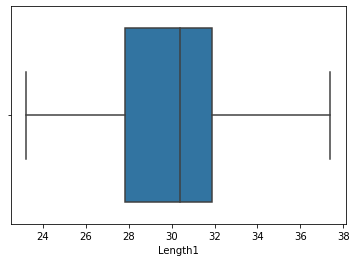

In [31]:
# Draw boxplot after removing outliers

# Only draw Bream's length1 ,Roach and Smelt 

# ======= Bream's length1 ======

sns.boxplot( x= df_Bream.Length1)
plt.show()


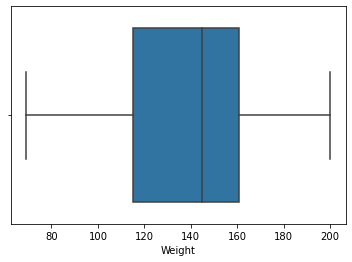

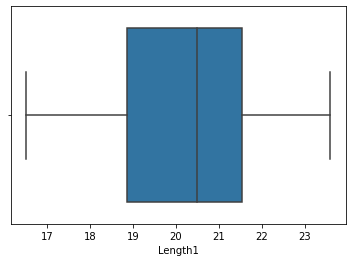

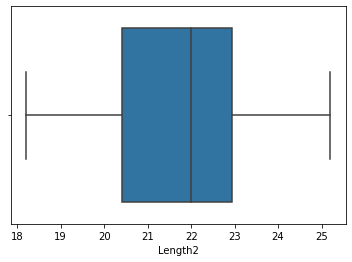

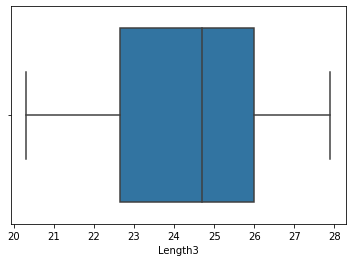

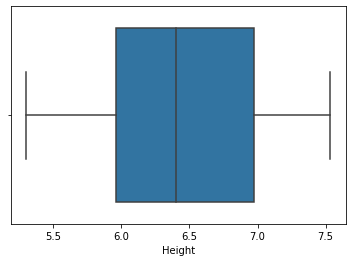

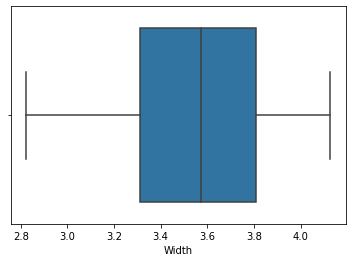

In [32]:
# ======== Roach ==========
sns.boxplot( x = df_Roach.Weight)
plt.show()
sns.boxplot( x = df_Roach.Length1)
plt.show()
sns.boxplot( x = df_Roach.Length2)
plt.show()
sns.boxplot( x = df_Roach.Length3)
plt.show()
sns.boxplot( x = df_Roach.Height)
plt.show()
sns.boxplot( x = df_Roach.Width)
plt.show()


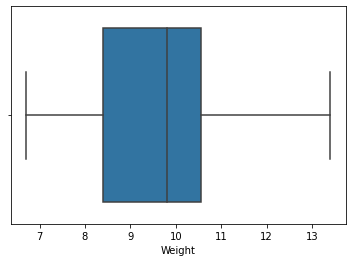

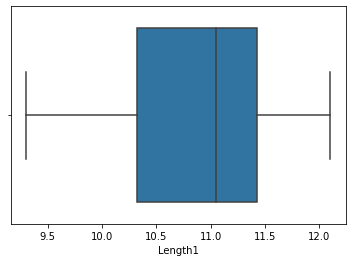

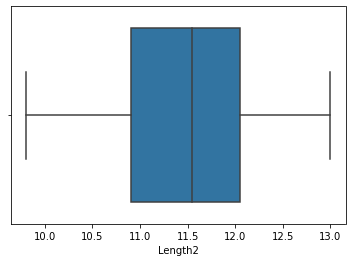

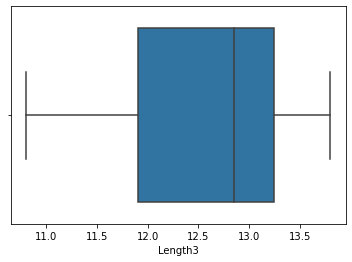

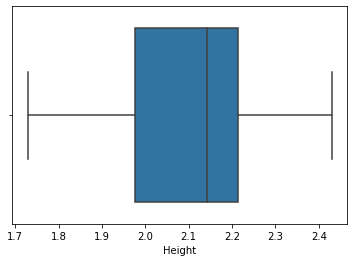

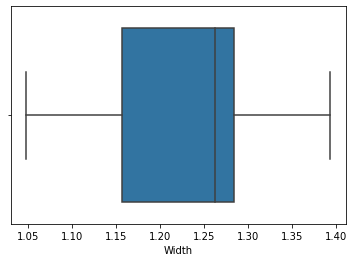

In [33]:
# ======== Smelt ==========
sns.boxplot( x = df_Smelt.Weight)
plt.show()
sns.boxplot( x = df_Smelt.Length1)
plt.show()
sns.boxplot( x = df_Smelt.Length2)
plt.show()
sns.boxplot( x = df_Smelt.Length3)
plt.show()
sns.boxplot( x = df_Smelt.Height)
plt.show()
sns.boxplot( x = df_Smelt.Width)
plt.show()

## Data Preparation <a name="Preparation"></a>

All outliers are removed from the dataset. Now we concate all dataframes after we handled the outliers.

In [34]:
df = pd.concat([df_Bream, df_Roach, df_Whitefish, df_Parkki, df_Perch, df_Pike, df_Smelt], ignore_index = True)

df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
146,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
147,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
148,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
149,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690


After removing outliers, this dataset contains 151 records.

Species is categorical. So I create dummies variables for further analysis.

In [35]:
df = pd.get_dummies(df, drop_first = True)

df

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
146,9.9,11.3,11.8,13.1,2.2139,1.1659,0,0,0,0,1,0
147,9.8,11.4,12.0,13.2,2.2044,1.1484,0,0,0,0,1,0
148,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
149,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0


In [36]:
# Split the dataset into the training set and test set
X = df.iloc[:, 1:]
y = df.iloc[:, 0].to_frame()

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=42)
X_train 

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
105,32.5,35.0,37.3,11.4884,7.7957,0,1,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
32,36.2,39.5,45.3,18.7542,6.7497,0,0,0,0,0,0
42,20.5,22.5,25.3,7.0334,3.8203,0,0,0,1,0,0
144,10.8,11.3,12.6,1.9782,1.2852,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
71,16.2,18.0,19.2,5.2224,3.3216,0,1,0,0,0,0
106,34.0,36.5,39.0,10.8810,6.8640,0,1,0,0,0,0
14,29.4,32.0,37.2,14.9544,5.1708,0,0,0,0,0,0
92,22.6,24.6,26.2,6.7334,4.1658,0,1,0,0,0,0


### Scaling the training data using StandardScaler

I use StandardScaler to prepare data for training by regularized regression to get faster convergence and appropriate coefficient values (for numerical data only)

In [37]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaler.fit(X_train.iloc[:, 0:5])
y_scaler.fit(y_train)


X_train_continous_scaled = X_scaler.transform(X_train.iloc[:, 0:5])
X_test_continous_scaled = X_scaler.transform(X_test.iloc[:,0:5])

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [38]:
col_name = X_train.columns.to_list()
col_name

X_train_scaled = pd.DataFrame(np.hstack((X_train_continous_scaled, X_train.iloc[:,5:])), columns  = col_name )
X_test_scaled = pd.DataFrame(np.hstack((X_test_continous_scaled, X_test.iloc[:, 5:])),columns  = col_name )
y_train_scaled = pd.DataFrame(y_train_scaled, columns = ['Weight'])
y_test_scaled = pd.DataFrame(y_test_scaled, columns = ['Weight'])



In [39]:
X_train_scaled.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.619841,0.610064,0.531007,0.652282,1.926011,0.0,1.0,0.0,0.0,0.0,0.0
1,0.007050,0.038050,0.238176,0.894442,0.368922,0.0,0.0,0.0,0.0,0.0,0.0
2,0.997729,1.039074,1.240901,2.493517,1.314103,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.605741,-0.581632,-0.533834,-0.476665,-0.399590,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.596420,-1.649391,-1.660790,-1.757710,-1.882618,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
X_test_scaled.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,-0.758939,-0.724635,-0.782297,-0.816464,-0.554790,0.0,1.0,0.0,0.0,0.0,0.0
1,0.456430,0.467060,0.646365,1.702570,0.368805,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.656807,-0.629300,-0.693560,-0.710665,-0.572340,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.656807,-0.629300,-0.693560,-0.829768,-0.572340,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.606633,-1.658924,-1.678538,-1.731101,-1.887298,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
y_train_scaled

,Weight
0,1.216423
1,0.072028
2,1.453676
3,-0.681598
4,-1.103908
...,...
108,-0.849070
109,0.783786
110,0.546533
111,-0.603444


In [42]:
y_test_scaled

,Weight
0,-0.821158
1,0.574445
2,-0.765334
3,-0.793246
4,-1.100837
5,1.537412
6,-0.779290
7,-0.366192
8,-0.974675
9,-0.765334


## Model Training <a name="Modeltraining"></a>

In [43]:
df_train = pd.concat([y_train_scaled, X_train_scaled], axis =1 )
df_train

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1.216423,0.619841,0.610064,0.531007,0.652282,1.926011,0.0,1.0,0.0,0.0,0.0,0.0
1,0.072028,0.007050,0.038050,0.238176,0.894442,0.368922,0.0,0.0,0.0,0.0,0.0,0.0
2,1.453676,0.997729,1.039074,1.240901,2.493517,1.314103,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.681598,-0.605741,-0.581632,-0.533834,-0.476665,-0.399590,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.103908,-1.596420,-1.649391,-1.660790,-1.757710,-1.882618,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,-0.849070,-1.044908,-1.010642,-1.075128,-0.935593,-0.691328,0.0,1.0,0.0,0.0,0.0,0.0
109,0.783786,0.773039,0.753067,0.681859,0.498360,1.380968,0.0,1.0,0.0,0.0,0.0,0.0
110,0.546533,0.303232,0.324057,0.522133,1.530605,0.390450,0.0,0.0,0.0,0.0,0.0,0.0
111,-0.603444,-0.391264,-0.381427,-0.453971,-0.552689,-0.197473,0.0,1.0,0.0,0.0,0.0,0.0


###  Multiple linear regression

First, I run multiple linear regression for the whole training dataset. the dependent variable is Weight and the other fields are independent variables.

In [44]:
model_1 = sm.OLS.from_formula('Weight ~ Length1 + Length2 + Length3 + Height + Width + Species_Parkki + Species_Perch  + Species_Pike + Species_Roach + Species_Smelt + Species_Whitefish', data = df_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 28 May 2024   Prob (F-statistic):           4.52e-63
Time:                        18:37:08   Log-Likelihood:                 15.629
No. Observations:                 113   AIC:                            -7.259
Df Residuals:                     101   BIC:                             25.47
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5596      0.259     -2.158      0.033      -1.074      -0.045
Length1              -2.9631      1.044     -2.839      0.005      -5.033      -0.893
Length2               2.4307      1.358      1.790      0.076      -0.263       5.125
Length3               1.7261      0.967      1.785      0.077      -0.192       3.644
Height                0.1027      0.152      0.676      0.501      -0.199       0.404
Width                 0.0209      0.115      0.182      0.856      -0.207       0.248
Species_Parkki        0.6936      0.219      3.170      0.002       0.260       1.128
Species_Perch         0.7256      0.354      2.048      0.043       0.023       1.428
Species_Pike         -0.2368      0.404     -0.587      0.559      -1.038       0.564
Species_Roach         0.6660      0.278      2.395      0.018       0.114       1.218
Species_Smelt         1.8035      0.363      4.971      0.000       1.084       2.523
Species_Whitefish     0.5502      0.275      1.999      0.048       0.004       1.096
==============================================================================
Omnibus:                       15.042   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.367
Skew:                           0.714   Prob(JB):                     6.23e-05
Kurtosis:                       4.440   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of some variables (**Length2, Length3, Height, Width, Species_Pike**) are larger than  0.05.
You can try Bayesian Model Average to determine the better models.
Now, I just removed some statistically insignificant variables.

In [45]:
model_2 = sm.OLS.from_formula('Weight ~ Length1  +Length3 + Species_Parkki + Species_Perch  + Species_Roach + Species_Smelt + Species_Whitefish', data = df_train).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     303.7
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.19e-66
Time:                        18:37:08   Log-Likelihood:                 12.343
No. Observations:                 113   AIC:                            -8.687
Df Residuals:                     105   BIC:                             13.13
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8652      0.072    -12.055      0.000      -1.008      -0.723
Length1              -2.5713      0.284     -9.057      0.000      -3.134      -2.008
Length3               3.8894      0.306     12.717      0.000       3.283       4.496
Species_Parkki        1.0125      0.117      8.680      0.000       0.781       1.244
Species_Perch         1.2115      0.100     12.150      0.000       1.014       1.409
Species_Roach         0.8931      0.106      8.388      0.000       0.682       1.104
Species_Smelt         2.1403      0.158     13.506      0.000       1.826       2.455
Species_Whitefish     0.8566      0.117      7.340      0.000       0.625       1.088
==============================================================================
Omnibus:                        5.440   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.850
Skew:                           0.444   Prob(JB):                       0.0885
Kurtosis:                       3.490   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $Adjusted R^2$ = 0.95 and $R^2$ = 0.953 is quite high. It means the independent variables can explain 95% the variation of the dependent variable.
* **F-test:**: 
    - Null hypothesis: all slope parameters are equal to 0.
    - Alternative hypothesis: at least one of the slope parameters is not equal to zero. \
     p-value of *F-test* is nearly 0. It means the null hypothesis: the model with no independent variables fits the data should be rejected. Or,  **at least one of the slope parameters is not equal to 0.**
* **t-test:** All p-values of t-test are smaller than 0.05. Therefore, **all independent variables have statistical significance.**   
* **Durbin-Watson test:** Durbin-Watson value is 2.126, so it is in acceptable range (1.5-2.5). Therefore, there is no first order autocorrelation.
* No exist multicolinearity
* **Jarque-Bera test:**
     - Null hypothesis: skewness is equal zero and the excess kurtosis is equal zero. 
     - Alternative hypothesis: skewness is different from zero or the excess kurtosis is different from zero. \
      p-value of JB test is 0.0885, greater than 0.05. Therefore, we fail to reject the null hypothesis. The residuals from OLS is normally distributed. 
* **White test:** (Shown below)
     - Null hypothesis: Homoskedasticity is present
     - Alternative hypothesis: Heteroskedasticity is present
     p value of White test comes out to equal to 0.1722. Since the p-value is greater than 0.05, we fail to reject the null hypothesis. **There is no heteroskedasticity in this model.**

To check homoskedasticity assumption, you can also use some test like Breusch–Pagan test, Goldfeld–Quandt test...

In [46]:
# White's test for heteroskedasticity

white_test = het_white(model_2.resid,  model_2.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 25.80690199459297, 'Test Statistic p-value': 0.17228445291341318, 'F-Statistic': 1.3614810333699359, 'F-Test p-value': 0.16277189242905135}


In [47]:
# Result of MLR by statmodels:
from statsmodels.tools.eval_measures import rmse

y_pred = model_2.predict(X_test)
rmse_mlr_1 = rmse(y_test, y_pred)



print('R2:', model_2.rsquared)
print(f'RMSE:', rmse_mlr_1)


R2: 0.9529405342317984
RMSE: [516.29649267 494.46087723 515.34354023 515.34354023 528.73672338
 487.26774886 516.29649267 508.45977856 523.13348194 514.86766799
 508.93045983 497.19217107 515.88287662 496.6590972  494.3695119
 471.36385194 493.97917099 527.8657648  522.07770643 485.35910077
 488.35228206 515.34354023 491.04211155 489.18464923 497.13785291
 529.31642718 496.05629149 526.23851251 510.22568287 487.00257808
 492.56846048 495.56319281 498.19208028 497.01742923 497.08806677
 505.57960367 533.70720292 489.87373485]


In [48]:
# Train linear regression by Scikit-learn. (Must be same result)

X_train_model_2 = X_train[["Length1", "Length3","Species_Parkki", "Species_Perch" ,"Species_Roach" , "Species_Smelt" ,"Species_Whitefish"]]
y_train_model_2 = y_train
X_test_model_2 = X_test[["Length1", "Length3","Species_Parkki", "Species_Perch" ,"Species_Roach" , "Species_Smelt" ,"Species_Whitefish"]]
y_test_model_2 = y_test

# Fitting the data

lin_reg = LinearRegression().fit(X_train_model_2, y_train_model_2)

lin_reg.coef_

# Calculate R squared
score = lin_reg.score(X_train_model_2, y_train_model_2)
score_test = lin_reg.score(X_test_model_2, y_test_model_2)

# Predict on test set

y_pred_model_2 = lin_reg.predict(X_test_model_2)

# Calculate RMSE
rmse_mlr_2 = np.sqrt(mean_squared_error(y_test_model_2, y_pred_model_2))


print('R2:', score)
print('RMSE', rmse_mlr_2)



R2: 0.9529405342317984
RMSE 125.15351708597571
